In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# DNN-based Autoencoder

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:

class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu')
      #for more layers
      #layers.Dense(256, activation='relu'),
      #layers.Dense(128, activation='relu'),
      #layers.Dense(64, activation='relu'),
      #layers.Dense(32, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),                                  
      layers.Dense(784, activation='relu'),
      #for more layers
      #layers.Dense(64, activation='relu'),
      #layers.Dense(128, activation='relu'),
      #layers.Dense(256, activation='relu'),
      #layers.Dense(784, activation='relu')
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 3s 5ms/step - loss: 0.0810 - val_loss: 0.0289
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0272 - val_loss: 0.0248
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0243 - val_loss: 0.0233
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0222
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0219 - val_loss: 0.0215
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0205 - val_loss: 0.0203
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0201 - val_loss: 0.0199
Epoch 9/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0198 - val_loss: 0.0197
Epoch 10/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0195 - val_loss: 0.0194

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

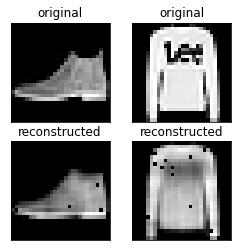

In [ ]:
n = 2
plt.figure(figsize=(4, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### SVM Classifier

In [ ]:
train_vectors = autoencoder.encoder(x_train).numpy()
test_vectors = autoencoder.encoder(x_test).numpy()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
clf = SVC()

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
               'kernel': ['linear', 'rbf']} 

# for test
#param_grid = {'C': [0.1], 
#               'kernel': ['linear']} 
  
grid = GridSearchCV(clf, param_grid, verbose = 1, refit = True)
  
# fitting the model for grid search
grid.fit(train_vectors, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
from sklearn.metrics import classification_report

# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(test_vectors)
# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1000
           1       0.98      0.95      0.97      1000
           2       0.71      0.69      0.70      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.73      0.72      1000
           5       0.94      0.90      0.92      1000
           6       0.56      0.48      0.52      1000
           7       0.89      0.93      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg

# CNN-based Autoencoder

In [ ]:
class Con_Autoencoder(Model):
  def __init__(self):
    super(Con_Autoencoder, self).__init__() 
    self.encoder = tf.keras.Sequential([
      layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.Conv2D(8, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.MaxPooling2D((2, 2))
    ])
    self.decoder = tf.keras.Sequential([
      layers.Conv2D(8, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'),
      layers.UpSampling2D((2, 2)),
      #layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Con_Autoencoder()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

In [ ]:
autoencoder.fit(x_train, x_train,
                batch_size=256,
                epochs=15,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n = 2
plt.figure(figsize=(4, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i][:,:,0])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i][:,:,0])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()